### Task 2: Prediction using Decision Tree Algorithm

### ||GRIP@ THE SPARKS FOUNDATION|| JUNE2021 DSBA TASK
### AUTHOR:ABHISHEK BINDHANI

This workshop deals with understanding the working of decision trees. I have created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.  

Technical Stack : scikit-learn, Numpy Array, Seaborn, Pandas, Matplotlib, Pydot

In [1]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

### Step 1 Reading Data

In [11]:
# LOADING THE DATASET
# url="https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view"
iris= pd.read_csv("C:/Users/USER/Desktop/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2 Exploratory Data Analysis

In [12]:
iris_df=iris.drop(columns='Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris_df.shape

(150, 5)

In [14]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Step 3 Data Vizualization

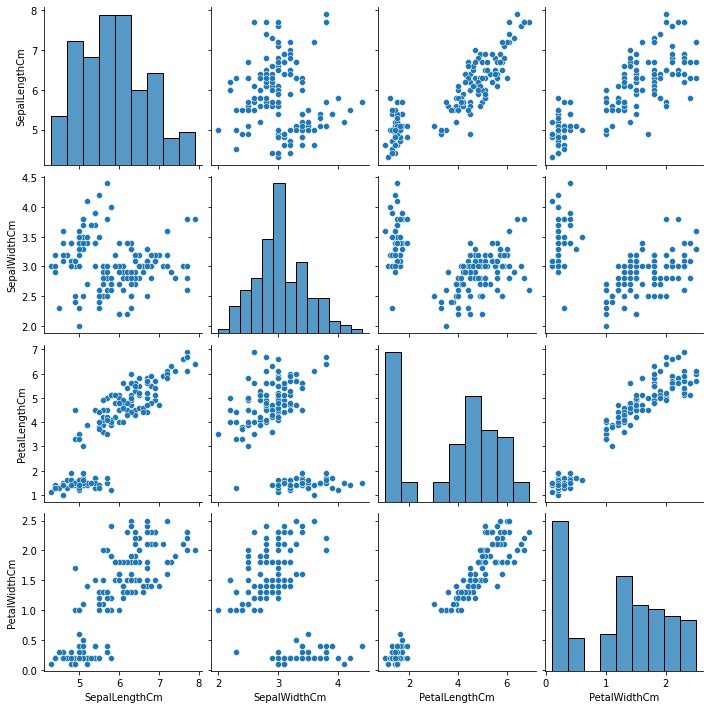

In [15]:
# Input data Visualization
sns.pairplot(iris_df)

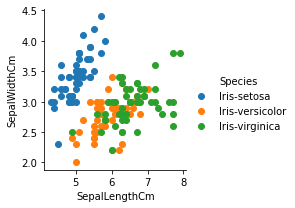

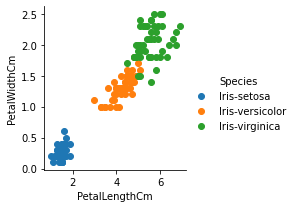

In [16]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(iris_df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(iris_df,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

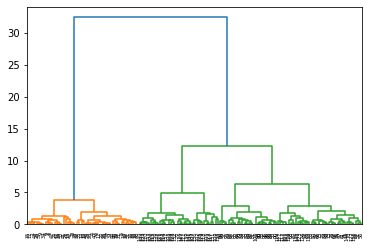

In [17]:
import scipy.cluster.hierarchy as sch
X = iris_df.drop(columns='Species').values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

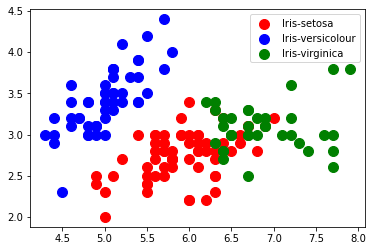

In [19]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()

In [20]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [22]:
iris_df['Species'] = iris_df['Species'].map(species)

In [23]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
X = iris_df.iloc[:, :4].values
y = iris_df.iloc[:, 4].values

In [25]:
X.shape, y.shape

((150, 4), (150,))

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


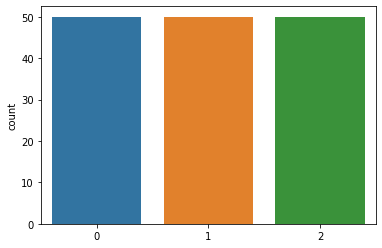

In [26]:
sns.countplot(y)
plt.show()

### Step 4 Model Training

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


### Step 5 - Comparing the actual and predicted

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


### Step 6 - Visualizing the Trained Model

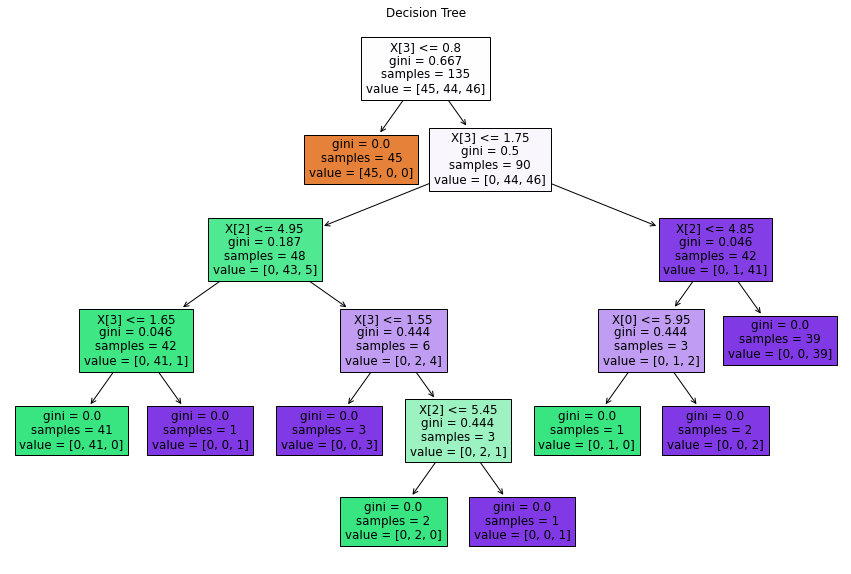

In [29]:
plt.figure(figsize = (15,10))
tree.plot_tree(tree_classifier, filled=True);
plt.title("Decision Tree")
plt.show()

### Step 8 - Checking the Model accuracy

In [30]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0



#### The accuracy of this model is 100% since for creating the decision tree model I have used all the 4 features of the iris dataset 

## Conclusion
#### I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.¶
## Thank You